In [344]:
def add_gdp_categories(df):

    df['GDP category'] = 0

    for index, row in df.iterrows():

        if row['Sink OFC'] == 'Yes':
            df.loc[index, 'Sink OFC'] = 1
        else:
            df.loc[index, 'Sink OFC'] = 0

        if row['Conduit OFC'] == 'Yes':
            df.loc[index, 'Conduit OFC'] = 1
        else:
            df.loc[index, 'Conduit OFC'] = 0

        if (row['GDP per capita (PWT)'] >= 2.5) | (row['GDP per capita (World Bank)'] >= 2.5):
            df.loc[index, 'GDP category'] = 1
        elif (row['GDP per capita (PWT)'] >= 2.0) | (row['GDP per capita (World Bank)'] >= 2.0):
            df.loc[index, 'GDP category'] = 2
        elif (row['GDP per capita (PWT)'] >= 1.5) | (row['GDP per capita (World Bank)'] >= 1.5):
            df.loc[index, 'GDP category'] = 3
        elif (row['GDP per capita (PWT)'] >= 1.0) | (row['GDP per capita (World Bank)'] >= 1.0):
            df.loc[index, 'GDP category'] = 4
        elif (row['GDP per capita (PWT)'] >= 0.5) | (row['GDP per capita (World Bank)'] >= 0.5):
            df.loc[index, 'GDP category'] = 5
        elif (row['GDP per capita (PWT)'] >= 0.0) | (row['GDP per capita (World Bank)'] >= 0.0):
            df.loc[index, 'GDP category'] = 6
        elif (row['GDP per capita (PWT)'] >= -0.5) | (row['GDP per capita (World Bank)'] >= -0.5):
            df.loc[index, 'GDP category'] = 7
        elif (row['GDP per capita (PWT)'] >= -1.0) | (row['GDP per capita (World Bank)'] >= -1.0):
            df.loc[index, 'GDP category'] = 8
        elif (row['GDP per capita (PWT)'] >= -1.5) | (row['GDP per capita (World Bank)'] >= -1.5):
            df.loc[index, 'GDP category'] = 9
        elif (row['GDP per capita (PWT)'] >= -2.0) | (row['GDP per capita (World Bank)'] >= -2.0):
            df.loc[index, 'GDP category'] = 10
        elif (row['GDP per capita (PWT)'] >= -2.5) | (row['GDP per capita (World Bank)'] >= -2.5):
            df.loc[index, 'GDP category'] = 11
        elif (row['GDP per capita (PWT)'] < -2.5) | (row['GDP per capita (World Bank)'] < -2.5):
            df.loc[index, 'GDP category'] = 12
        
    return df
    

In [345]:
from sklearn.preprocessing import StandardScaler

def standard_scaler(df, col_range):
    x = df.iloc[:, col_range].values #returns a numpy array
    gdp_mean = df['GDP per capita (PWT)'].mean()
    gdp_std = df['GDP per capita (PWT)'].std()
    std_scaler = StandardScaler()
    std_scaler.fit(x)
    x_scaled = std_scaler.transform(x)
    df_scaled = df
    df_scaled.iloc[:, col_range] = x_scaled
    return [df_scaled, gdp_mean, gdp_std]

In [346]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
sns.set()

# pd.option_context('display.max_rows', None, 'display.max_columns', None)
pd.set_option('display.max_columns', None)
# pd.reset_option('display.max_columns')




df = pd.read_csv('../outputs/db.csv', index_col=0)

col_range = list(range(6,16)) + list(range(17,26)) + list(range(27,43))

# df_2017 = df.loc[((df['Year'] == 2012) & (df['Subject'] == 'All')), ['Country','GDP per capita (World Bank)', 'GDP per capita (PWT)', 'Documents', 'H index', 'Citations', 'Self-citations', 'Population', 'Citations per Document', 'Avg. Adult Schooling', 'MAX TAMS', 'REAL TAMS', 'Documents / M-TAMS', 'Documents / R-TAMS', 'Citations / M-TAMS', 'Citations / R-TAMS', 'Gov. Effectiveness']]


for i, column in enumerate(df.columns.values):
    print(f"{i} - {column}")

0 - Independent
1 - Sink OFC
2 - Conduit OFC
3 - Code
4 - Country
5 - Year
6 - Population
7 - Population 25 Years Before
8 - Population 25+
9 - Population 25+ / Max Population 25+
10 - Documents
11 - Citable documents
12 - Citations
13 - Self-citations
14 - Citations per Document
15 - H index
16 - Subject
17 - Avg. Adult Schooling
18 - GDP per capita (World Bank)
19 - GDP per capita (PWT)
20 - MAX TAMS
21 - REAL TAMS
22 - Documents / M-TAMS
23 - Documents / R-TAMS
24 - Citations / M-TAMS
25 - Citations / R-TAMS
26 - Gov. Effectiveness
27 - Charges for the use of intellectual property, payments (BoP, current US$)
28 - Charges for the use of intellectual property, receipts (BoP, current US$)
29 - Firms that spend on R&D (% of firms)
30 - High-technology exports (current US$)
31 - Industrial design applications, nonresident, by count
32 - Industrial design applications, resident, by count
33 - Labor force with advanced education (% of total working-age population with advanced education)


In [347]:
display(df[df['Population 25+ / Max Population 25+'] >= 1.0].head(50))

,Independent,Sink OFC,Conduit OFC,Code,Country,Year,Population,Population 25 Years Before,Population 25+,Population 25+ / Max Population 25+,Documents,Citable documents,Citations,Self-citations,Citations per Document,H index,Subject,Avg. Adult Schooling,GDP per capita (World Bank),GDP per capita (PWT),MAX TAMS,REAL TAMS,Documents / M-TAMS,Documents / R-TAMS,Citations / M-TAMS,Citations / R-TAMS,Gov. Effectiveness,"Charges for the use of intellectual property, payments (BoP, current US$)","Charges for the use of intellectual property, receipts (BoP, current US$)",Firms that spend on R&D (% of firms),High-technology exports (current US$),"Industrial design applications, nonresident, by count","Industrial design applications, resident, by count",Labor force with advanced education (% of total working-age population with advanced education),"Patent applications, nonresidents","Patent applications, residents",Research and development expenditure (% of GDP),Researchers in R&D (per million people),Scientific and technical journal articles,Technicians in R&D (per million people),"Trademark applications, nonresident, by count","Trademark applications, resident, by count","Trademark applications, total"
Country code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
48,Yes,Yes,No,BHR,Bahrain,1996,578.661,220.311,307.507,1.395786,4,4,28,4,7.00,27,Agricultural and Biological Sciences,7.4,43504.511598,14624.1040,1630.3014,2275.5518,0.002454,0.001758,0.017175,0.012305,0.776640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2103.0
96,Yes,No,No,BRN,Brunei Darussalam,1996,304.620,135.672,146.893,1.082707,6,6,182,28,30.33,43,Agricultural and Biological Sciences,8.1,86411.964458,55146.7460,1098.9432,1189.8333,0.005460,0.005043,0.165595,0.152946,0.927290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.0
344,No,Yes,No,HKG,"China, Hong Kong SAR",1996,6185.584,3913.597,4187.219,1.069916,154,152,4137,667,26.86,157,Agricultural and Biological Sciences,8.8,32271.383674,32547.6480,34439.6536,36847.5272,0.004472,0.004179,0.120107,0.112258,1.036225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2059.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,16289.0
384,Yes,No,No,CIV,Côte d'Ivoire,1996,14665.125,5328.735,5373.246,1.008353,28,28,465,19,16.61,70,Agricultural and Biological Sciences,2.6,3027.802880,2298.2769,13854.7110,13970.4396,0.002021,0.002004,0.033568,0.033290,-0.260978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,Yes,No,No,DJI,Djibouti,1996,643.649,169.372,239.056,1.411426,2,2,27,0,13.50,12,Agricultural and Biological Sciences,2.8,NaN,2323.7708,474.2416,669.3568,0.004217,0.002988,0.056933,0.040337,-0.893308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,No,No,No,GUF,French Guiana,1996,141.786,49.619,68.435,1.379210,7,7,360,9,51.43,52,Agricultural and Biological Sciences,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.901294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
376,Yes,No,No,ISR,Israel,1996,5424.241,2900.016,2902.739,1.000939,830,823,28017,4201,33.76,250,Agricultural and Biological Sciences,11.7,24489.335961,26556.9840,33930.1872,33962.0463,0.024462,0.024439,0.825837,0.825062,0.774173,1.833000e+08,1.582000e+08,NaN,NaN,364.0,1217.0,NaN,2101.0,1218.0,2.59385,NaN,NaN,NaN,NaN,NaN,6902.0
414,Yes,No,No,KWT,Kuwait,1996,1626.858,798.639,886.098,1.109510,33,33,398,69,12.06,48,Agricultural and Biological Sciences,5.9,80453.959586,45134.9490,4711.9701,5227.9782,0.007003,0.006312,0.084461,0.076125,0.115852,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
512,Yes,No,No,OMN,Oman,1996,2236.652,748.968,973.619,1.299947,38,38,675,75,17.76,72,Agricultural and Biological Sciences,NaN,NaN,12001.5570,NaN,NaN,NaN,NaN,NaN,NaN,0.439419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [348]:
def rearrange_db(df, year, step, subjects=['All']):

    years = sorted(df[df['Year'] <= year]['Year'].unique(), reverse=True)
    last_year = years[-1] + step
    df_rearranged = pd.DataFrame()

    for year in years:

        if year >= last_year:
            
            df_economic = df.loc[((df['Year'] == year) & (df['Subject'].isin(subjects))), ['Year', 'Country','GDP per capita (World Bank)', 'GDP per capita (PWT)']]

            df_science = df.loc[((df['Year'] == (year - step)) & (df['Subject'].isin(subjects)))].drop(['Year','Country','GDP per capita (World Bank)', 'GDP per capita (PWT)'], axis=1)

            df_merged = df_economic.join(df_science, how='left')
            df_merged = df_merged[(df_merged['GDP per capita (World Bank)'].notna()) | (df_merged['GDP per capita (PWT)'].notna())]
            df_rearranged = df_rearranged.append(df_merged)

    return df_rearranged

subjects = ['All']
df_rearranged = rearrange_db(df, 2017, 3, subjects)
col_range_rearranged = [2,3] + list(range(8,18)) + list(range(19,26)) + list(range(27,43))
df_rearranged, df_rearranged_mean, df_rearranged_std = standard_scaler(df_rearranged, col_range_rearranged)
df_rearranged = add_gdp_categories(df_rearranged)


# df_rearranged.sort_values(by='GDP per capita (PWT)', inplace=True, ascending=False)
print (set(df['Subject'].values))
df_rearranged.corr()

{'Environmental Science', 'Multidisciplinary', 'All', 'Computer Science', 'Pharmacology, Toxicology and Pharmaceutics', 'Social Sciences', 'Earth and Planetary Sciences', 'Biochemistry, Genetics and Molecular Biology', 'Energy', 'Immunology and Microbiology', 'Mathematics', 'Dentistry', 'Materials Science', 'Psychology', 'Chemistry', 'Chemical Engineering', 'Health Professions', 'Veterinary', 'Nursing', 'Physics and Astronomy', 'Engineering', 'Medicine', 'Arts and Humanities', 'Neuroscience', 'Economics, Econometrics and Finance', 'Decision Sciences', 'Business, Management and Accounting', 'Agricultural and Biological Sciences'}


,Year,GDP per capita (World Bank),GDP per capita (PWT),Population,Population 25 Years Before,Population 25+,Population 25+ / Max Population 25+,Documents,Citable documents,Citations,Self-citations,Citations per Document,H index,Avg. Adult Schooling,MAX TAMS,REAL TAMS,Documents / M-TAMS,Documents / R-TAMS,Citations / M-TAMS,Citations / R-TAMS,Gov. Effectiveness,"Charges for the use of intellectual property, payments (BoP, current US$)","Charges for the use of intellectual property, receipts (BoP, current US$)",Firms that spend on R&D (% of firms),High-technology exports (current US$),"Industrial design applications, nonresident, by count","Industrial design applications, resident, by count",Labor force with advanced education (% of total working-age population with advanced education),"Patent applications, nonresidents","Patent applications, residents",Research and development expenditure (% of GDP),Researchers in R&D (per million people),Scientific and technical journal articles,Technicians in R&D (per million people),"Trademark applications, nonresident, by count","Trademark applications, resident, by count","Trademark applications, total",GDP category
Year,1.000000,0.053989,0.093394,0.012377,0.019727,0.022846,0.040963,0.083218,0.078663,0.022609,0.016154,-0.167756,-0.015310,0.162149,0.029337,0.031872,0.160608,0.157860,0.042880,0.033715,-0.005718,0.132404,0.072421,-0.455111,-0.012791,-0.074542,0.036830,-0.165072,0.038785,0.042872,0.039391,0.106664,0.057192,0.036256,0.032558,0.049002,0.069338,0.004001
GDP per capita (World Bank),0.053989,1.000000,0.966183,-0.053209,-0.030484,-0.025598,0.573688,0.238103,0.237066,0.250463,0.179470,0.090029,0.477430,0.543465,0.032019,0.036505,0.695439,0.622378,0.609245,0.560525,0.698909,0.418308,0.299881,-0.130046,0.203707,0.298737,0.032638,0.128417,0.184343,0.137084,0.558748,0.663475,0.219896,0.584795,0.358090,0.087512,0.071295,-0.919431
GDP per capita (PWT),0.093394,0.966183,1.000000,-0.056317,-0.034854,-0.025821,0.568712,0.220155,0.218846,0.230517,0.166912,0.114107,0.407561,0.579284,0.041503,0.046816,0.724133,0.655563,0.640450,0.594771,0.688457,0.431710,0.319319,-0.167536,0.191081,0.268477,0.027581,0.153433,0.210159,0.159676,0.495746,0.617522,0.241038,0.522124,0.314403,0.072669,0.072232,-0.782932
Population,0.012377,-0.053209,-0.056317,1.000000,0.991715,0.989266,0.002117,0.434224,0.456504,0.272107,0.298418,-0.068965,0.306390,-0.041561,0.928669,0.925751,-0.040961,-0.038287,-0.044683,-0.043701,-0.000948,0.199376,0.133455,0.098534,0.662482,0.325416,0.552652,-0.120198,0.410057,0.382287,0.069457,-0.074709,0.520884,-0.073524,0.553868,0.718627,0.670323,0.076159
Population 25 Years Before,0.019727,-0.030484,-0.034854,0.991715,1.000000,0.999461,-0.000489,0.486935,0.511637,0.309835,0.335655,-0.067522,0.339246,-0.004627,0.963240,0.961149,-0.022699,-0.016982,-0.028896,-0.026229,0.021924,0.236950,0.160255,0.097828,0.724286,0.376189,0.629287,-0.118240,0.452016,0.448865,0.098920,-0.046838,0.574492,-0.039758,0.614330,0.785183,0.738163,0.055809
Population 25+,0.022846,-0.025598,-0.025821,0.989266,0.999461,1.000000,0.006081,0.492429,0.517254,0.313949,0.341324,-0.065300,0.338503,-0.000349,0.965467,0.964552,-0.017439,-0.012655,-0.025010,-0.022462,0.032259,0.240888,0.165238,0.102305,0.733823,0.380354,0.637588,-0.114993,0.460605,0.456132,0.101110,-0.045419,0.582135,-0.033717,0.621021,0.793579,0.746779,0.043101
Population 25+ / Max Population 25+,0.040963,0.573688,0.568712,0.002117,-0.000489,0.006081,1.000000,0.023812,0.023837,0.021011,0.014575,-0.032544,0.080451,0.105332,0.000748,0.008937,0.307250,0.118464,0.190703,0.083940,0.223528,0.141754,0.058456,0.073997,0.037894,0.034430,0.013409,0.122353,0.050338,0.019170,0.128233,0.109953,0.025819,0.082655,0.062630,0.003893,0.017405,-0.468727
Documents,0.083218,0.238103,0.220155,0.434224,0.486935,0.492429,0.023812,1.000000,0.998023,0.920923,0.902331,0.055021,0.744623,0.266091,0.659482,0.666258,0.271088,0.297366,0.252061,0.264397,0.282708,0.638833,0.844871,0.088712,0.746062,0

In [368]:
df_rearranged[df_rearranged['Sink OFC'] == 1]['GDP category'].value_counts()

7    112
5    108
8     94
6     75
4     74
1     19
Name: GDP category, dtype: int64

In [350]:
df.isna().sum()
# df[df['Firms that spend on R&D (% of firms)'].notna()]

Independent                                                                                             0
Sink OFC                                                                                                0
Conduit OFC                                                                                             0
Code                                                                                                    0
Country                                                                                                 0
Year                                                                                                    0
Population                                                                                              0
Population 25 Years Before                                                                              0
Population 25+                                                                                       4701
Population 25+ / Max Population 25+           

In [351]:
display(df_rearranged)

for i, column in enumerate(df_rearranged.columns.values):
    print(f"{i} - {column}")

,Year,Country,GDP per capita (World Bank),GDP per capita (PWT),Independent,Sink OFC,Conduit OFC,Code,Population,Population 25 Years Before,Population 25+,Population 25+ / Max Population 25+,Documents,Citable documents,Citations,Self-citations,Citations per Document,H index,Subject,Avg. Adult Schooling,MAX TAMS,REAL TAMS,Documents / M-TAMS,Documents / R-TAMS,Citations / M-TAMS,Citations / R-TAMS,Gov. Effectiveness,"Charges for the use of intellectual property, payments (BoP, current US$)","Charges for the use of intellectual property, receipts (BoP, current US$)",Firms that spend on R&D (% of firms),High-technology exports (current US$),"Industrial design applications, nonresident, by count","Industrial design applications, resident, by count",Labor force with advanced education (% of total working-age population with advanced education),"Patent applications, nonresidents","Patent applications, residents",Research and development expenditure (% of GDP),Researchers in R&D (per million people),Scientific and technical journal articles,Technicians in R&D (per million people),"Trademark applications, nonresident, by count","Trademark applications, resident, by count","Trademark applications, total",GDP category
Country code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,2017,Afghanistan,-0.777799,NaN,Yes,0,0,AFG,-0.007339,-0.125711,-0.105832,0.489369,-0.238451,-0.243935,-0.202983,-0.144759,3.350623,-0.612653,All,-1.283119,-0.224734,-0.209655,-0.588325,-0.623231,-0.448224,-0.466850,-1.331396,-0.288592,-0.179035,-0.081122,NaN,NaN,NaN,0.675661,NaN,NaN,NaN,NaN,-0.242821,NaN,NaN,NaN,NaN,8
8,2017,Albania,-0.253190,-0.228727,Yes,0,0,ALB,-0.239510,-0.219075,-0.228964,-0.732660,-0.228932,-0.233667,-0.206716,-0.144604,-1.227087,-0.575192,All,0.687342,-0.239795,-0.249413,-0.419851,-0.333952,-0.484808,-0.480269,-0.085558,-0.283749,-0.178998,NaN,-0.292714,-0.223994,-0.183297,-0.831756,-0.257783,-0.206259,NaN,NaN,-0.238824,NaN,-0.357568,-0.27167,-0.243678,8
12,2017,Algeria,-0.142470,-0.209815,Yes,0,0,DZA,0.034965,0.017813,0.024130,0.159883,-0.124161,-0.121033,-0.179055,-0.126730,-1.052344,-0.244285,All,0.115273,0.012866,0.026043,-0.309296,-0.322498,-0.442952,-0.453793,-0.477553,-0.256585,-0.179044,NaN,-0.292677,-0.458097,-0.163578,NaN,-0.225808,-0.204653,NaN,NaN,-0.144166,NaN,NaN,NaN,-0.170526,7
24,2017,Angola,-0.567130,-0.572345,Yes,0,0,AGO,-0.056319,-0.130201,-0.134564,-0.010461,-0.238604,-0.243814,-0.208218,-0.144796,-1.088152,-0.646993,All,-0.838176,-0.202629,-0.200481,-0.597841,-0.628176,-0.511918,-0.523943,-1.123669,-0.232371,-0.176134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.242854,NaN,NaN,NaN,NaN,8
660,2017,Anguilla,NaN,-0.132988,No,0,0,AIA,-0.261468,-0.254305,NaN,NaN,-0.240726,-0.246037,-0.208655,-0.144995,-0.287482,-0.712550,All,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.952229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,1999,Venezuela (Bolivarian Republic of),-0.129216,-0.499355,Yes,0,0,VEN,-0.091030,-0.127044,-0.120996,0.207640,-0.217794,-0.220983,-0.195413,-0.140624,-0.376286,-0.110049,All,-0.583923,-0.186228,-0.176258,-0.437567,-0.462472,-0.418586,-0.430650,-0.540713,-0.288171,-0.179098,NaN,NaN,NaN,NaN,NaN,-0.176549,-0.202972,NaN,NaN,NaN,NaN,NaN,NaN,-0.036251,7
704,1999,Viet Nam,-0.745151,-0.721597,Yes,0,0,VNM,0.317956,0.227915,0.200139,-0.046466,-0.234424,-0.239176,-0.204357,-0.143383,-0.161438,-0.113171,All,-0.869958,0.035876,0.024065,-0.603426,-0.634262,-0.506547,-0.517919,-0.580876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.216429,-0.205743,NaN,NaN,NaN,NaN,NaN,NaN,-0.191069,8
887,1999,Yemen,-0.674554,-0.766465,Yes,0,0,YEM,-0.143723,-0.186196,-0.189023,-0.052600,-0.240157,-0.245409,-0.208367,-0.144853,-0.468671,-0.556461,All,-2.141223,-0.280057,-0.274949,-0.541514,-0.562611,-0.477885,-0.486074,-0.624155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

0 - Year
1 - Country
2 - GDP per capita (World Bank)
3 - GDP per capita (PWT)
4 - Independent
5 - Sink OFC
6 - Conduit OFC
7 - Code
8 - Population
9 - Population 25 Years Before
10 - Population 25+
11 - Population 25+ / Max Population 25+
12 - Documents
13 - Citable documents
14 - Citations
15 - Self-citations
16 - Citations per Document
17 - H index
18 - Subject
19 - Avg. Adult Schooling
20 - MAX TAMS
21 - REAL TAMS
22 - Documents / M-TAMS
23 - Documents / R-TAMS
24 - Citations / M-TAMS
25 - Citations / R-TAMS
26 - Gov. Effectiveness
27 - Charges for the use of intellectual property, payments (BoP, current US$)
28 - Charges for the use of intellectual property, receipts (BoP, current US$)
29 - Firms that spend on R&D (% of firms)
30 - High-technology exports (current US$)
31 - Industrial design applications, nonresident, by count
32 - Industrial design applications, resident, by count
33 - Labor force with advanced education (% of total working-age population with advanced education)


In [352]:
col_range = list(range(20,28)) + [0, 2, 3, 5, 6, 43]

# df_saturated = df[(df['Subject'] == 'All') & (df['Year'] <= 2017) & (df['Year'] >= 2000) & (df['Sink OFC'] != 'Yes')].iloc[:, col_range].dropna()

df_saturated = df_rearranged.iloc[:, col_range].dropna()
# df_saturated = df_rearranged[(df_rearranged['Sink OFC'] != 1)].iloc[:, col_range].dropna()
# df_saturated = df_saturated[(df_saturated.iloc[:, 1:] <= 2.5) & (df_saturated.iloc[:, 1:] >= -2.5)]
df_saturated = df_saturated[(df_saturated['GDP per capita (PWT)'] <= 2.5) & (df_saturated['GDP per capita (PWT)'] >= -2.5)]

# df_saturated = df_saturated.groupby(by=[df_saturated.index, 'Year']).mean()


df_saturated.describe()

,MAX TAMS,REAL TAMS,Documents / M-TAMS,Documents / R-TAMS,Citations / M-TAMS,Citations / R-TAMS,Gov. Effectiveness,"Charges for the use of intellectual property, payments (BoP, current US$)",Year,GDP per capita (World Bank),GDP per capita (PWT),GDP category
count,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000
mean,0.100122,0.093189,0.097458,0.125826,0.073419,0.078580,0.131638,0.047474,2009.700524,0.001343,-0.058228,6.868063
std,1.209571,1.202083,1.092128,1.100559,1.063315,1.038477,0.952490,1.048770,4.963602,0.830290,0.699738,1.422846
min,-0.287213,-0.281828,-0.616354,-0.648841,-0.516703,-0.529165,-2.041475,-0.291713,1999.000000,-0.840444,-0.792270,1.000000
25%,-0.263675,-0.261227,-0.545998,-0.563461,-0.472935,-0.477462,-0.613184,-0.288000,2006.000000,-0.638658,-0.603866,6.000000
50%,-0.216585,-0.218309,-0.400637,-0.389269,-0.391810,-0.383331,-0.045428,-0.280975,2010.000000,-0.258880,-0.291948,7.000000
75%,-0.062969,-0.072847,0.210585,0.286685,-0.061439,-0.028894,0.830649,-0.159609,2014.000000,0.395508,0.281557,8.000000
max,13.052533,13.080867,6.225772,5.365404,5.618516,5.558006,2.436975,10.237169,2017.000000,4.261891,2.489753,8.000000


In [353]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, mean_squared_error, make_scorer,  median_absolute_error, explained_variance_score, mean_gamma_deviance
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
from sklearn.preprocessing import  OneHotEncoder
from sklearn.preprocessing import StandardScaler

hot_enc = OneHotEncoder(sparse=False)

df_test = df_saturated[['GDP per capita (PWT)', 'Documents / M-TAMS', 'Charges for the use of intellectual property, payments (BoP, current US$)', 'Gov. Effectiveness', 'Sink OFC', 'Conduit OFC', 'GDP category']]

X = df_test.iloc[:, 1:-1]
y = df_test.iloc[:, 0]

# scaler = StandardScaler()
# scaler.fit(X)
# X_scaled = scaler.transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1001, stratify=df_test.iloc[:, -1])



lr = LinearRegression()

lr.fit(X_train,y_train)


LinearRegression()

In [354]:
lr.score(X_test, y_test)

0.8369195211136358

In [355]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

pipe = make_pipeline(lr)
scorer = make_scorer(mean_squared_error)

y_pred = pipe.predict(X_test)

cv_scores = cross_val_score(pipe, X, y, cv=10, scoring=scorer)

cv_scores.mean()
y_pred

array([ 0.18965074, -0.49350706,  1.33304442,  0.24538793,  0.1448793 ,
        0.30150908,  0.25333669, -0.0536159 , -0.1404547 ,  0.38939516,
        1.279606  ,  1.8213999 , -0.72115547, -0.48413007, -0.88598614,
        1.24111502, -0.09281691, -0.74830603, -0.47841534,  0.83842364,
        1.19460547, -0.90639872, -0.64711825,  0.63909643, -0.03195465,
        0.73846686, -0.62527539,  0.02634639,  0.48056838,  0.23443627,
       -0.10529546,  0.99631403, -0.62148319, -0.46099686, -0.53899295,
       -0.14304563,  0.57438355,  0.33900866,  0.43400064, -0.34824103,
        1.05338868, -0.24248622,  0.725727  ,  0.32127219, -0.27598296,
       -0.60294515, -0.2543614 , -0.65787334, -0.17687759, -0.55519236,
       -0.59877874, -0.0939146 , -0.851174  , -0.62722093, -0.63879315,
        1.09704027,  0.59719455,  0.23872524, -0.12987302, -0.46662065,
       -0.62780952, -0.2062774 , -0.27385704,  0.26457681, -0.23858804,
        0.29466844,  1.22662689,  1.46410767, -0.73826036,  0.12

In [356]:
cv_scores.std()

0.012338168473732494

In [371]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  OneHotEncoder


df_1 = df_saturated[['GDP per capita (PWT)', 'Documents / M-TAMS', 'Charges for the use of intellectual property, payments (BoP, current US$)', 'Gov. Effectiveness', 'Sink OFC', 'Conduit OFC', 'GDP category']]

X = df_1.iloc[:, 1:]
y = df_1.iloc[:, 0]

# scaler = StandardScaler()
# scaler.fit(X)
# X_scaled = scaler.transform(X)

# col_transf = make_column_transformer((OneHotEncoder(), ['sex','embarked']),
#                                      remainder='passthrough')
# hot_enc = OneHotEncoder(sparse=False)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1001, stratify=df_test.iloc[:, -1])


# pipeline de predição: features polinomiais + regressão linear
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)

linear_regression = LinearRegression()

pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression)])

pipeline.fit(X_train, y_train)
        
# Avalia o modelo com crossvalidation
scores = cross_val_score(pipeline, X_test, y_test,
scoring="neg_mean_absolute_error", cv=10)

pipeline.score(X_test, y_test)

0.9311960911335486

In [372]:
scores.mean()

-0.14745289492210717

In [373]:
# df_rearranged[(df_rearranged.index == 840) & (df_rearranged['Gov. Effectiveness'] > 1.46)]

In [381]:
y_pred = pipeline.predict(X_test)
# y_transform = df_rearranged_mean + (y_pred * df_rearranged_std)
# y_transform
y_pred
df_y_pred = pd.DataFrame(y_pred)
df_y_pred
teste = X_test.reset_index()
teste
df_y_pred = df_y_pred[df_y_pred >= 1.5]
y_errors = df_y_pred.dropna()
teste_errors = teste[teste.index.isin(y_errors.index)]
teste_errors


,Country code,Documents / M-TAMS,"Charges for the use of intellectual property, payments (BoP, current US$)",Gov. Effectiveness,Sink OFC,Conduit OFC,GDP category
11,702,4.436514,1.823399,1.958422,0,1,3
19,442,1.166314,-0.194458,1.625627,1,0,1
36,442,-0.051126,-0.280198,1.920923,1,0,1
86,756,3.071798,0.297696,2.180724,0,1,3
99,528,3.166551,8.040595,1.783959,0,1,4
105,528,2.729600,7.011933,1.729366,0,1,4
137,702,6.225772,4.825778,2.088955,0,1,3
141,372,2.056754,7.597076,1.500238,0,1,4
198,414,0.876398,-0.288616,-0.063936,0,0,1
221,756,3.752660,0.752963,2.042494,0,1,3


In [383]:
all_y_pred = pipeline.predict(X)
# y_transform = df_rearranged_mean + (y_pred * df_rearranged_std)
# y_transform
all_y_pred
df_1['Residue'] = df_1['GDP per capita (PWT)'] - all_y_pred
df_1[(df_1['Residue'] > 0.5) | (df_1['Residue'] < -0.5)]

,GDP per capita (PWT),Documents / M-TAMS,"Charges for the use of intellectual property, payments (BoP, current US$)",Gov. Effectiveness,Sink OFC,Conduit OFC,GDP category,Residue
Country code,,,,,,,,
52,-0.360718,-0.032311,-0.285528,1.204714,1,0,6,-0.558920
690,0.768571,0.168050,-0.288003,0.360770,1,0,6,0.505916
780,1.148180,-0.184612,-0.273009,0.272078,0,0,6,1.041823
52,-0.353206,0.003854,-0.285785,1.357322,1,0,6,-0.548743
398,0.215832,-0.506872,-0.255718,-0.532778,0,0,7,0.507322
780,1.237132,-0.304694,-0.275089,0.362185,0,0,6,1.145453
52,-0.330828,0.018935,-0.286509,1.462176,1,0,6,-0.522987
398,0.241368,-0.566030,-0.254717,-0.440245,0,0,7,0.534742
578,2.288832,3.564891,-0.157874,1.909127,0,0,2,0.562697


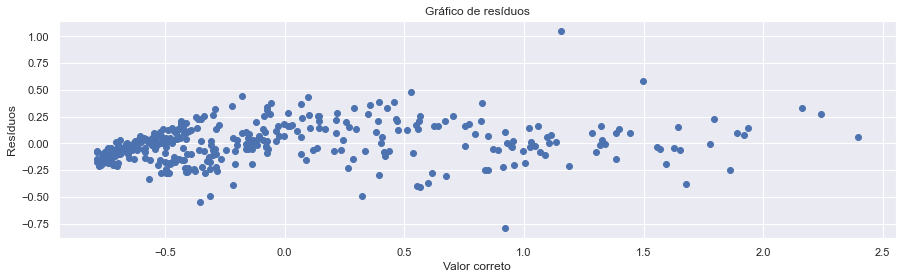

In [375]:
# Gráfico de resíduos (diferença entre a predição e o valor verdadeiro esperado)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
plt.scatter(y_test,y_test-y_pred)
plt.title("Gráfico de resíduos")
plt.xlabel("Valor correto")
plt.ylabel("Resíduos")
plt.show()

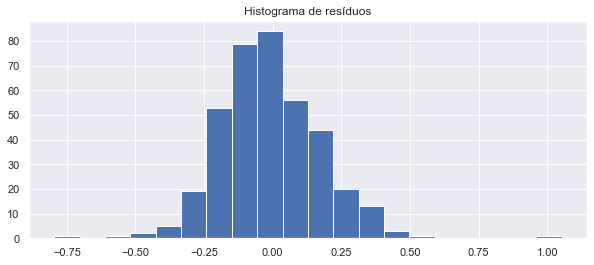

In [362]:
plt.figure(figsize=(10,4))
plt.hist(y_test-y_pred, bins= 20)
plt.title("Histograma de resíduos")
plt.show()

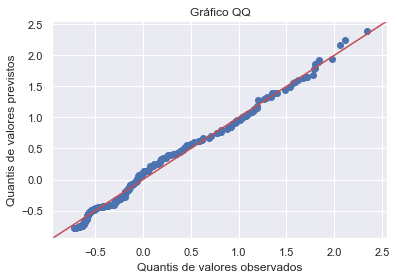

In [363]:
## Gráfico QQ
from statsmodels.graphics.gofplots import qqplot_2samples

qqplot_2samples(y_test,y_pred,line='45')
plt.title("Gráfico QQ")
plt.xlabel("Quantis de valores observados")
plt.ylabel("Quantis de valores previstos")
plt.show()